# Clustering Anamoly Detection Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

Clustering - DBSCAN

Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [2]:
url = env.get_db_url('grocery_db')

In [3]:
customers = pd.read_sql('SELECT * FROM grocery_customers',url)

In [55]:
customers.shape

(440, 9)

In [24]:
frozen_deli_paper = customers[['Frozen','Detergents_Paper','Delicassen']]

In [26]:
frozen_deli_paper.head()

,Frozen,Detergents_Paper,Delicassen
0,214,2674,1338
1,1762,3293,1776
2,2405,3516,7844
3,6404,507,1788
4,3915,1777,5185


In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(frozen_deli_paper)

MinMaxScaler()

In [30]:
frozen_deli_paper = scaler.transform(frozen_deli_paper)
frozen_deli_paper

array([[-4.10835805e-04, -7.18835195e-05, -6.19973444e-05],
       [-4.10417651e-04, -7.15121044e-05, -6.18067641e-05],
       [-4.10243961e-04, -7.13782990e-05, -5.91664870e-05],
       ...,
       [-4.10775567e-04, -6.45830230e-05, -6.17671686e-05],
       [-4.10613222e-04, -7.33871806e-05, -6.16549090e-05],
       [-4.10876053e-04, -7.32017730e-05, -6.25569021e-05]])

In [31]:
dbscan = DBSCAN(eps = .10, min_samples=20)

In [32]:
dbscan.fit(frozen_deli_paper)

DBSCAN(eps=0.1, min_samples=20)

In [33]:
columns = ['Frozen','Detergents_Paper','Delicassen']
columns

['Frozen', 'Detergents_Paper', 'Delicassen']

In [34]:
scaled_columns = ["Scaled_" + column for column in columns]
scaled_columns

['Scaled_Frozen', 'Scaled_Detergents_Paper', 'Scaled_Delicassen']

In [56]:
original_df = customers[['Frozen','Detergents_Paper','Delicassen']].copy()
original_df.shape

(440, 3)

In [57]:
scaled_df = pd.DataFrame(frozen_deli_paper, columns=scaled_columns)
scaled_df.shape

(440, 3)

In [45]:
customers[['Frozen','Detergents_Paper','Delicassen']]

,Frozen,Detergents_Paper,Delicassen
0,214,2674,1338
1,1762,3293,1776
2,2405,3516,7844
3,6404,507,1788
4,3915,1777,5185
...,...,...,...
435,13135,182,2204
436,4510,93,2346
437,437,14841,1867
438,1038,168,2125


In [58]:
customers = (customers[['Frozen','Detergents_Paper','Delicassen']]
             .merge(scaled_df, left_index=True,right_index=True))

In [60]:
customers.head()

,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen
0,214,2674,1338,-0.000411,-0.000072,-0.000062
1,1762,3293,1776,-0.000410,-0.000072,-0.000062
2,2405,3516,7844,-0.000410,-0.000071,-0.000059
3,6404,507,1788,-0.000409,-0.000073,-0.000062
4,3915,1777,5185,-0.000410,-0.000072,-0.000060


In [61]:
customers['labels'] = dbscan.labels_
customers.labels.value_counts()

0    440
Name: labels, dtype: int64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


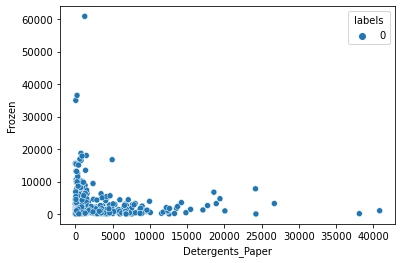

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


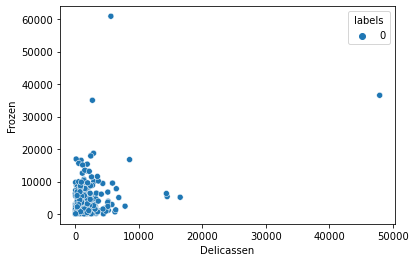

In [65]:
sns.scatterplot(customers.Detergents_Paper, customers.Frozen, hue=customers.labels)
plt.show()

sns.scatterplot(customers.Delicassen, customers.Frozen, hue=customers.labels)
plt.show()


/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_76697/472023052.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


Text(0.5, 0, 'Detergents_Paper')

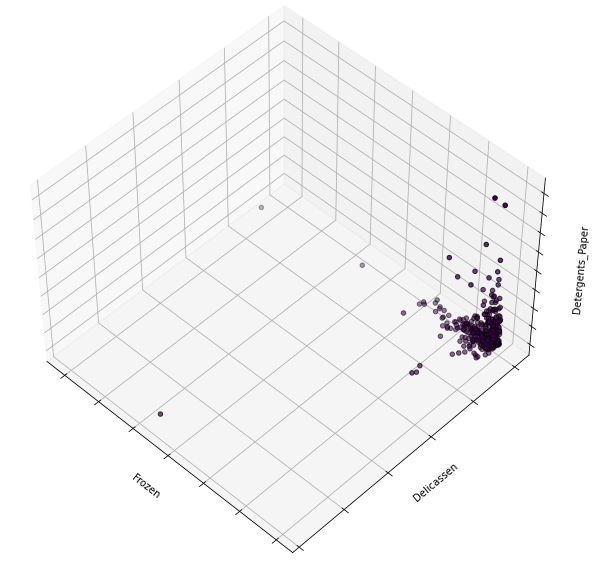

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(customers.Frozen, customers.Delicassen, customers.Detergents_Paper,
           c=customers.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Delicassen')
ax.set_zlabel('Detergents_Paper')


Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.

In [ ]:
url = env.get_db_url('curriculum_logs')
logs = pd.read_sql('SELECT * FROM logs',url)

In [ ]:
logs.head()

Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [ ]:
url = env.get_db_url('zillow')
logerror = pd.read_sql(
    'SELECT bedroomcnt as bed,calculatedfinishedsquarefeet as square_feet \
    FROM properties_2017 JOIN predictions_2017 USING(parcelid)\
    WHERE propertylandusetypeid = 261',\
    url)

In [ ]:
logerror.head()